In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate


# Data Exploration

In [26]:
df = pd.read_csv('train-5.csv')
df.head(5)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


# Data Cleaning and handling missing values 

In [27]:
df.drop(['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 22.9+ MB


In [28]:
df.isnull().sum()

Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [29]:
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
df.isnull().sum()


/var/folders/2z/kf92m3b96t51tf0khtbqm3xh0000gn/T/ipykernel_49721/229930663.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/2z/kf92m3b96t51tf0khtbqm3xh0000gn/T/ipykernel_49721/229930663.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

# Data Visualization

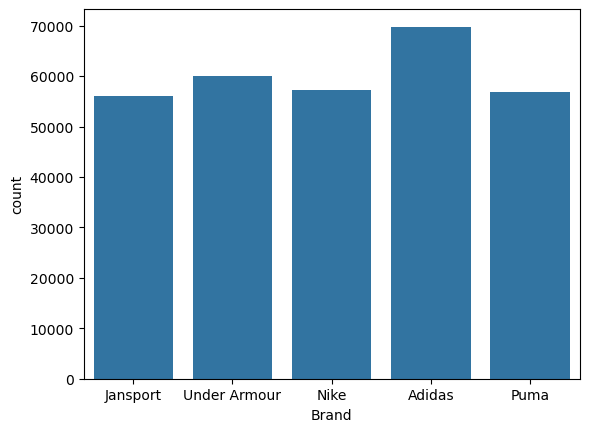

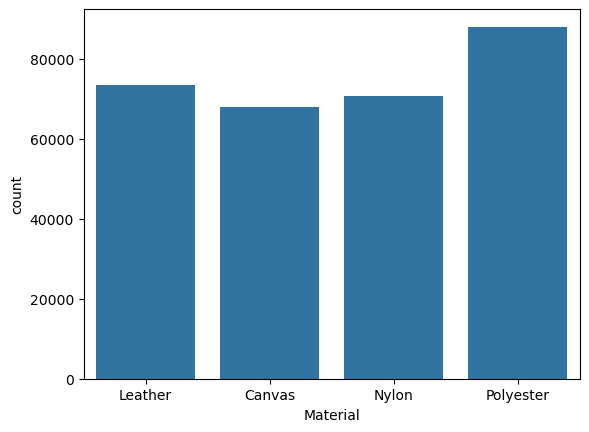

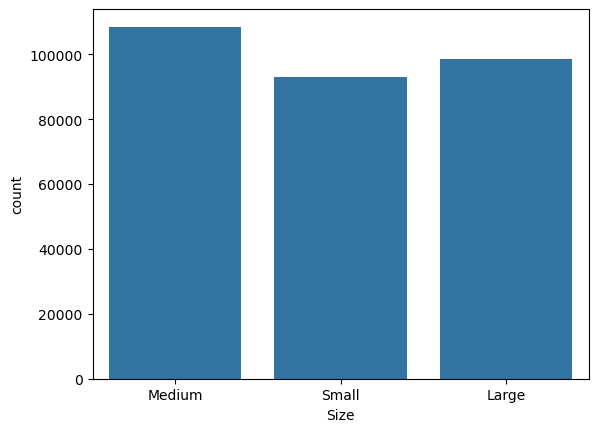

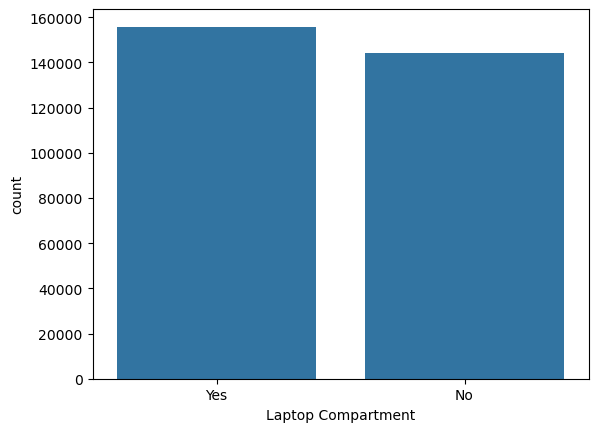

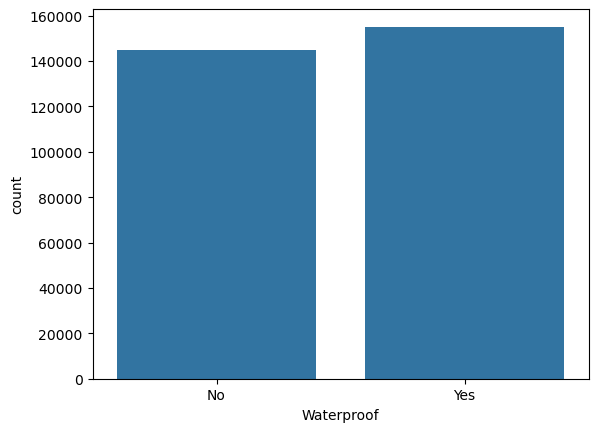

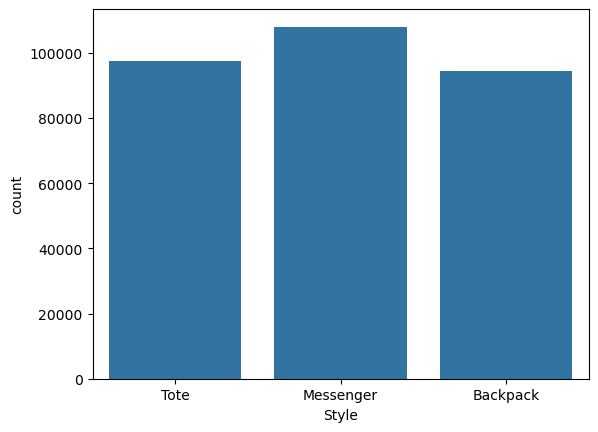

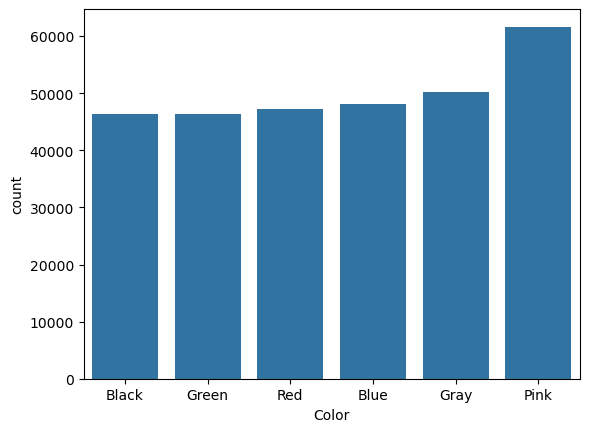

In [19]:
#visualize data by each column according to their value counts and unique values
for col in df.columns:
    if df[col].dtype == 'object':
        sns.countplot(x=col, data=df)
        plt.show()
   


# Encoding 

In [30]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cardinality = df[cat_cols].nunique()
cardinality

Brand                 5
Material              4
Size                  3
Laptop Compartment    2
Waterproof            2
Style                 3
Color                 6
dtype: int64

In [31]:
# Encoding
encoder = LabelEncoder()
for col in cat_cols:
    cardinality = df[col].nunique()
    if cardinality <= 4:
        # one-hot encoding
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
        # drop the original column and merge the dummy columns
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
    else:
        # Apply label encoding
        df[col] = encoder.fit_transform(df[col])
df.head()

,Brand,Compartments,Color,Weight Capacity (kg),Price,Material_Canvas,Material_Leather,Material_Nylon,Material_Polyester,Size_Large,Size_Medium,Size_Small,Laptop Compartment_No,Laptop Compartment_Yes,Waterproof_No,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote
0,1,7.0,0,11.611723,112.15875,0,1,0,0,0,1,0,0,1,1,0,0,0,1
1,1,10.0,3,27.078537,68.88056,1,0,0,0,0,0,1,0,1,0,1,0,1,0
2,4,2.0,5,16.643760,39.17320,0,1,0,0,0,0,1,0,1,1,0,0,1,0
3,2,8.0,3,12.937220,80.60793,0,0,1,0,0,0,1,0,1,1,0,0,1,0
4,0,1.0,3,17.749338,86.02312,1,0,0,0,0,1,0,0,1,0,1,0,1,0


# Feature Selection - mutual info before scaling

In [34]:
mi_scores = mutual_info_regression(df.drop('Price', axis=1), df['Price'])



In [47]:
df.columns.nunique()

19

In [49]:
a = df.drop('Price', axis=1)
mi_scores = pd.DataFrame(mi_scores, index=a.columns, columns=['Mutual Information'])
mi_scores = mi_scores.sort_values(by='Mutual Information', ascending=False)
mi_scores

,Mutual Information
Color,0.026873
Brand,0.020491
Weight Capacity (kg),0.015785
Compartments,0.015491
Material_Polyester,0.009689
Size_Medium,0.008697
Material_Leather,0.008384
Style_Tote,0.008336
Style_Messenger,0.008044
Size_Large,0.008042


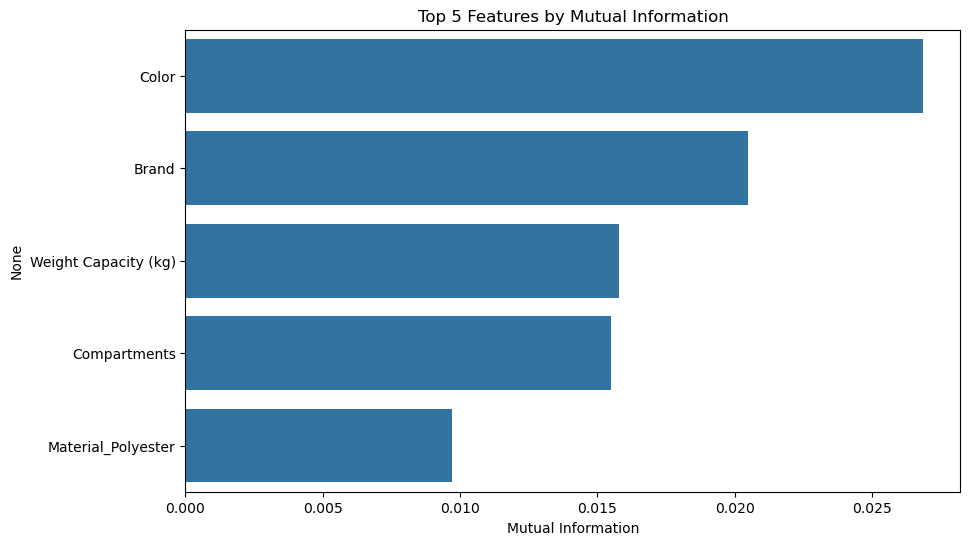

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores['Mutual Information'][:5], y=mi_scores.index[:5])
plt.title('Top 5 Features by Mutual Information')
plt.show()

# Scaling

In [51]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [52]:
df.head()

,Brand,Compartments,Color,Weight Capacity (kg),Price,Material_Canvas,Material_Leather,Material_Nylon,Material_Polyester,Size_Large,Size_Medium,Size_Small,Laptop Compartment_No,Laptop Compartment_Yes,Waterproof_No,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote
0,1,0.538408,0,-0.921464,0.787608,0,1,0,0,0,1,0,0,1,1,0,0,0,1
1,1,1.576198,3,1.299089,-0.320973,1,0,0,0,0,0,1,0,1,0,1,0,1,0
2,4,-1.191240,5,-0.199020,-1.081934,0,1,0,0,0,0,1,0,1,1,0,0,1,0
3,2,0.884338,3,-0.731164,-0.020574,0,0,1,0,0,0,1,0,1,1,0,0,1,0
4,0,-1.537170,3,-0.040293,0.118138,1,0,0,0,0,1,0,0,1,0,1,0,1,0


# Skewness

In [53]:
skewness = df[num_cols].skew()
skewness_df = pd.DataFrame(skewness, index=num_cols, columns=['Skewness'])
skewness_df = skewness_df.sort_values(by='Skewness', ascending=False)
skewness_df

,Skewness
Price,0.036883
Compartments,0.029125
Weight Capacity (kg),-0.064254


# Mutual information after scaling

In [55]:
mi_scores_new = mutual_info_regression(df.drop('Price', axis=1), df['Price'])


In [57]:
a = df.drop('Price', axis=1)
mi_scores_new = pd.DataFrame(mi_scores, index=a.columns, columns=['Mutual Information'])
mi_scores_new = mi_scores.sort_values(by='Mutual Information', ascending=False)
mi_scores_new.head()

,Mutual Information
Color,0.026873
Brand,0.020491
Weight Capacity (kg),0.015785
Compartments,0.015491
Material_Polyester,0.009689


# Model training

In [58]:
x = df.drop(columns=['Price'])
y = df['Price']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [59]:
x_train.shape, y_train.shape

((240000, 18), (240000,))

In [60]:
x_val.shape, y_val.shape

((30000, 18), (30000,))

# Model selection - Random Forest Regressor


In [61]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
y_pred = rf.predict(x_val)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE: ',mse)
print('R2: ',r2)

MSE:  1.0636868697307285
R2:  -0.06535803184125233


In [75]:
data = [
  ["mse_linear", mse],
  ["r2_linear", r2]
]


headers = ['Method', 'Result']
table = tabulate(data, headers, tablefmt='grid')
print(table)

+------------+-----------+
| Method     |    Result |
+============+===========+
| mse_linear |  1.06369  |
+------------+-----------+
| r2_linear  | -0.065358 |
+------------+-----------+
